In [1]:
import pandas as pd
from covid import Covid

In [2]:
covid = Covid()
help(covid)

Help on Covid in module covid.john_hopkins.covid object:

class Covid(builtins.object)
 |  Class handells all functionality
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_data(self) -> list
 |      Method fetches all data related to Covid
 |  
 |  get_status_by_country_id(self, country_id) -> dict
 |      Method fetches and returns specific country information related to coronavirus
 |      
 |      Args:
 |          country (str):  Country name e.g. "sweden"
 |      
 |      Returns:
 |          dict: Country related information regarding Coronavirus
 |          example:
 |                  {
 |                      'country': 'Sweden',
 |                      'confirmed': 355,
 |                      'active': 334,
 |                      'deaths': 0,
 |                      'recovered': 1,
 |                      'latitude': 63.0,
 |                      'longitude': 16.0,
 |                 

In [3]:
covid.list_countries()

[{'id': '18', 'name': 'US'},
 {'id': '22', 'name': 'Brazil'},
 {'id': '14', 'name': 'Russia'},
 {'id': '17', 'name': 'United Kingdom'},
 {'id': '94', 'name': 'India'},
 {'id': '19', 'name': 'Spain'},
 {'id': '11', 'name': 'Italy'},
 {'id': '23', 'name': 'Peru'},
 {'id': '7', 'name': 'France'},
 {'id': '8', 'name': 'Germany'},
 {'id': '96', 'name': 'Iran'},
 {'id': '177', 'name': 'Turkey'},
 {'id': '21', 'name': 'Chile'},
 {'id': '20', 'name': 'Mexico'},
 {'id': '154', 'name': 'Saudi Arabia'},
 {'id': '139', 'name': 'Pakistan'},
 {'id': '3', 'name': 'Canada'},
 {'id': '4', 'name': 'China'},
 {'id': '146', 'name': 'Qatar'},
 {'id': '38', 'name': 'Bangladesh'},
 {'id': '41', 'name': 'Belgium'},
 {'id': '40', 'name': 'Belarus'},
 {'id': '12', 'name': 'Netherlands'},
 {'id': '163', 'name': 'South Africa'},
 {'id': '15', 'name': 'Sweden'},
 {'id': '71', 'name': 'Ecuador'},
 {'id': '179', 'name': 'United Arab Emirates'},
 {'id': '159', 'name': 'Singapore'},
 {'id': '24', 'name': 'Colombia'},


In [4]:
covid.get_status_by_country_name('India')

{'id': '94',
 'country': 'India',
 'confirmed': 254242,
 'active': 124387,
 'deaths': 7117,
 'recovered': 122738,
 'latitude': 20.593684,
 'longitude': 78.96288,
 'last_update': 1591544003000}

In [5]:
column_names = ['ID', 'Name of Country', 'Total Confirmed', 'Active Cases', 'Deaths',
                'Recovered', 'Latitude', 'Longitude', 'Last Updated at']
covid_df = pd.DataFrame(columns=column_names)


In [6]:
from time import ctime
ctime(1591407175000//1000)

'Sat Jun  6 07:02:55 2020'

In [7]:
covid_df

,ID,Name of Country,Total Confirmed,Active Cases,Deaths,Recovered,Latitude,Longitude,Last Updated at


In [8]:
row = 0
for country_obj in covid.list_countries():
    country_id = country_obj['id']
    country_name = country_obj['name']
    
    try:
        country_stats = covid.get_status_by_country_id(country_obj['id'])
        country_id = country_obj['id']
        country_name = country_obj['name']
        country_confirmed = country_stats['confirmed']
        country_active = country_stats['active']
        country_deaths = country_stats['deaths']
        country_recovered = country_stats['recovered']
        country_latitude = country_stats['latitude']
        country_longitude = country_stats['longitude']
        country_updated = ctime(country_stats['last_update']//1000)
        
        country_df_series = [country_id, country_name, country_confirmed, country_active, country_deaths,
                         country_recovered, country_latitude, country_longitude, country_updated]
        covid_df.loc[row] = country_df_series
        row += 1
    except:
        pass

In [9]:
covid_df

,ID,Name of Country,Total Confirmed,Active Cases,Deaths,Recovered,Latitude,Longitude,Last Updated at
0,18,US,1922054,1363382,109846,500849,40,-100,Sun Jun 7 21:03:23 2020
1,22,Brazil,672846,359767,35930,277149,-14.235,-51.9253,Sun Jun 7 21:03:23 2020
2,14,Russia,467073,234950,5851,226272,61.524,105.319,Sun Jun 7 21:03:23 2020
3,17,United Kingdom,287621,245757,40625,1239,55,-3,Sun Jun 7 21:03:23 2020
4,94,India,254242,124387,7117,122738,20.5937,78.9629,Sun Jun 7 21:03:23 2020
5,19,Spain,241550,64038,27136,150376,40.4637,-3.74922,Sun Jun 7 21:03:23 2020
6,11,Italy,234801,35877,33846,165078,41.8719,12.5674,Sun Jun 7 21:03:23 2020
7,23,Peru,191758,103726,5301,82731,-9.19,-75.0152,Sun Jun 7 21:03:23 2020
8,7,France,190759,90690,29145,70924,46.2276,2.2137,Sun Jun 7 21:03:23 2020
9,8,Germany,185745,7856,8685,169204,51.1657,10.4515,Sun Jun 7 21:03:23 2020


In [10]:
covid_df.shape

(186, 9)

In [11]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 9 columns):
ID                 186 non-null object
Name of Country    186 non-null object
Total Confirmed    186 non-null object
Active Cases       186 non-null object
Deaths             186 non-null object
Recovered          186 non-null object
Latitude           185 non-null object
Longitude          185 non-null object
Last Updated at    186 non-null object
dtypes: object(9)
memory usage: 14.5+ KB


In [12]:
covid_df.describe()

,ID,Name of Country,Total Confirmed,Active Cases,Deaths,Recovered,Latitude,Longitude,Last Updated at
count,186,186,186,186,186,186,185.0000,185.0000,186
unique,186,186,179,160,117,174,185.0000,185.0000,1
top,182,France,26,0,0,24,28.1667,-1.0232,Sun Jun 7 21:03:23 2020
freq,1,1,3,8,19,3,1.0000,1.0000,186


In [13]:
covid_df['Total Confirmed'] = covid_df['Total Confirmed'].astype('int64')
covid_df['Active Cases'] = covid_df['Active Cases'].astype('int64')
covid_df['Deaths'] = covid_df['Deaths'].astype('int64')
covid_df['Recovered'] = covid_df['Recovered'].astype('int64')

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
covid_df.corr()

,Total Confirmed,Active Cases,Deaths,Recovered
Total Confirmed,1.000000,0.979016,0.932381,0.918606
Active Cases,0.979016,1.000000,0.914167,0.820162
Deaths,0.932381,0.914167,1.000000,0.829210
Recovered,0.918606,0.820162,0.829210,1.000000


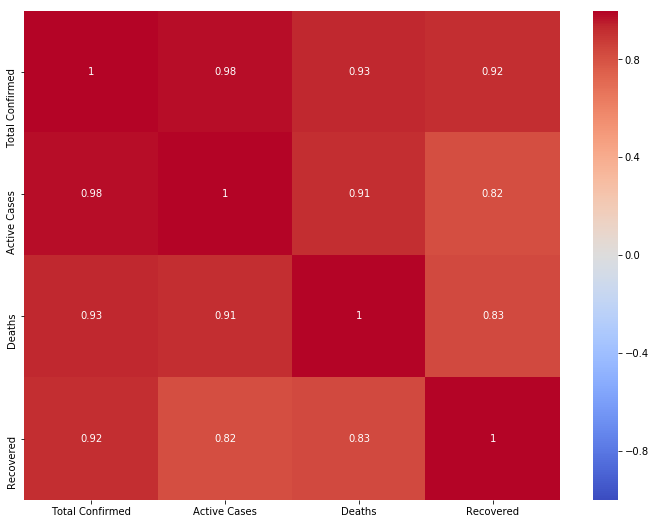

In [16]:
plt.figure(figsize=(12, 9))
sns.heatmap(covid_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [17]:
covid_df.sort_values('Total Confirmed', ascending=False, inplace=True)

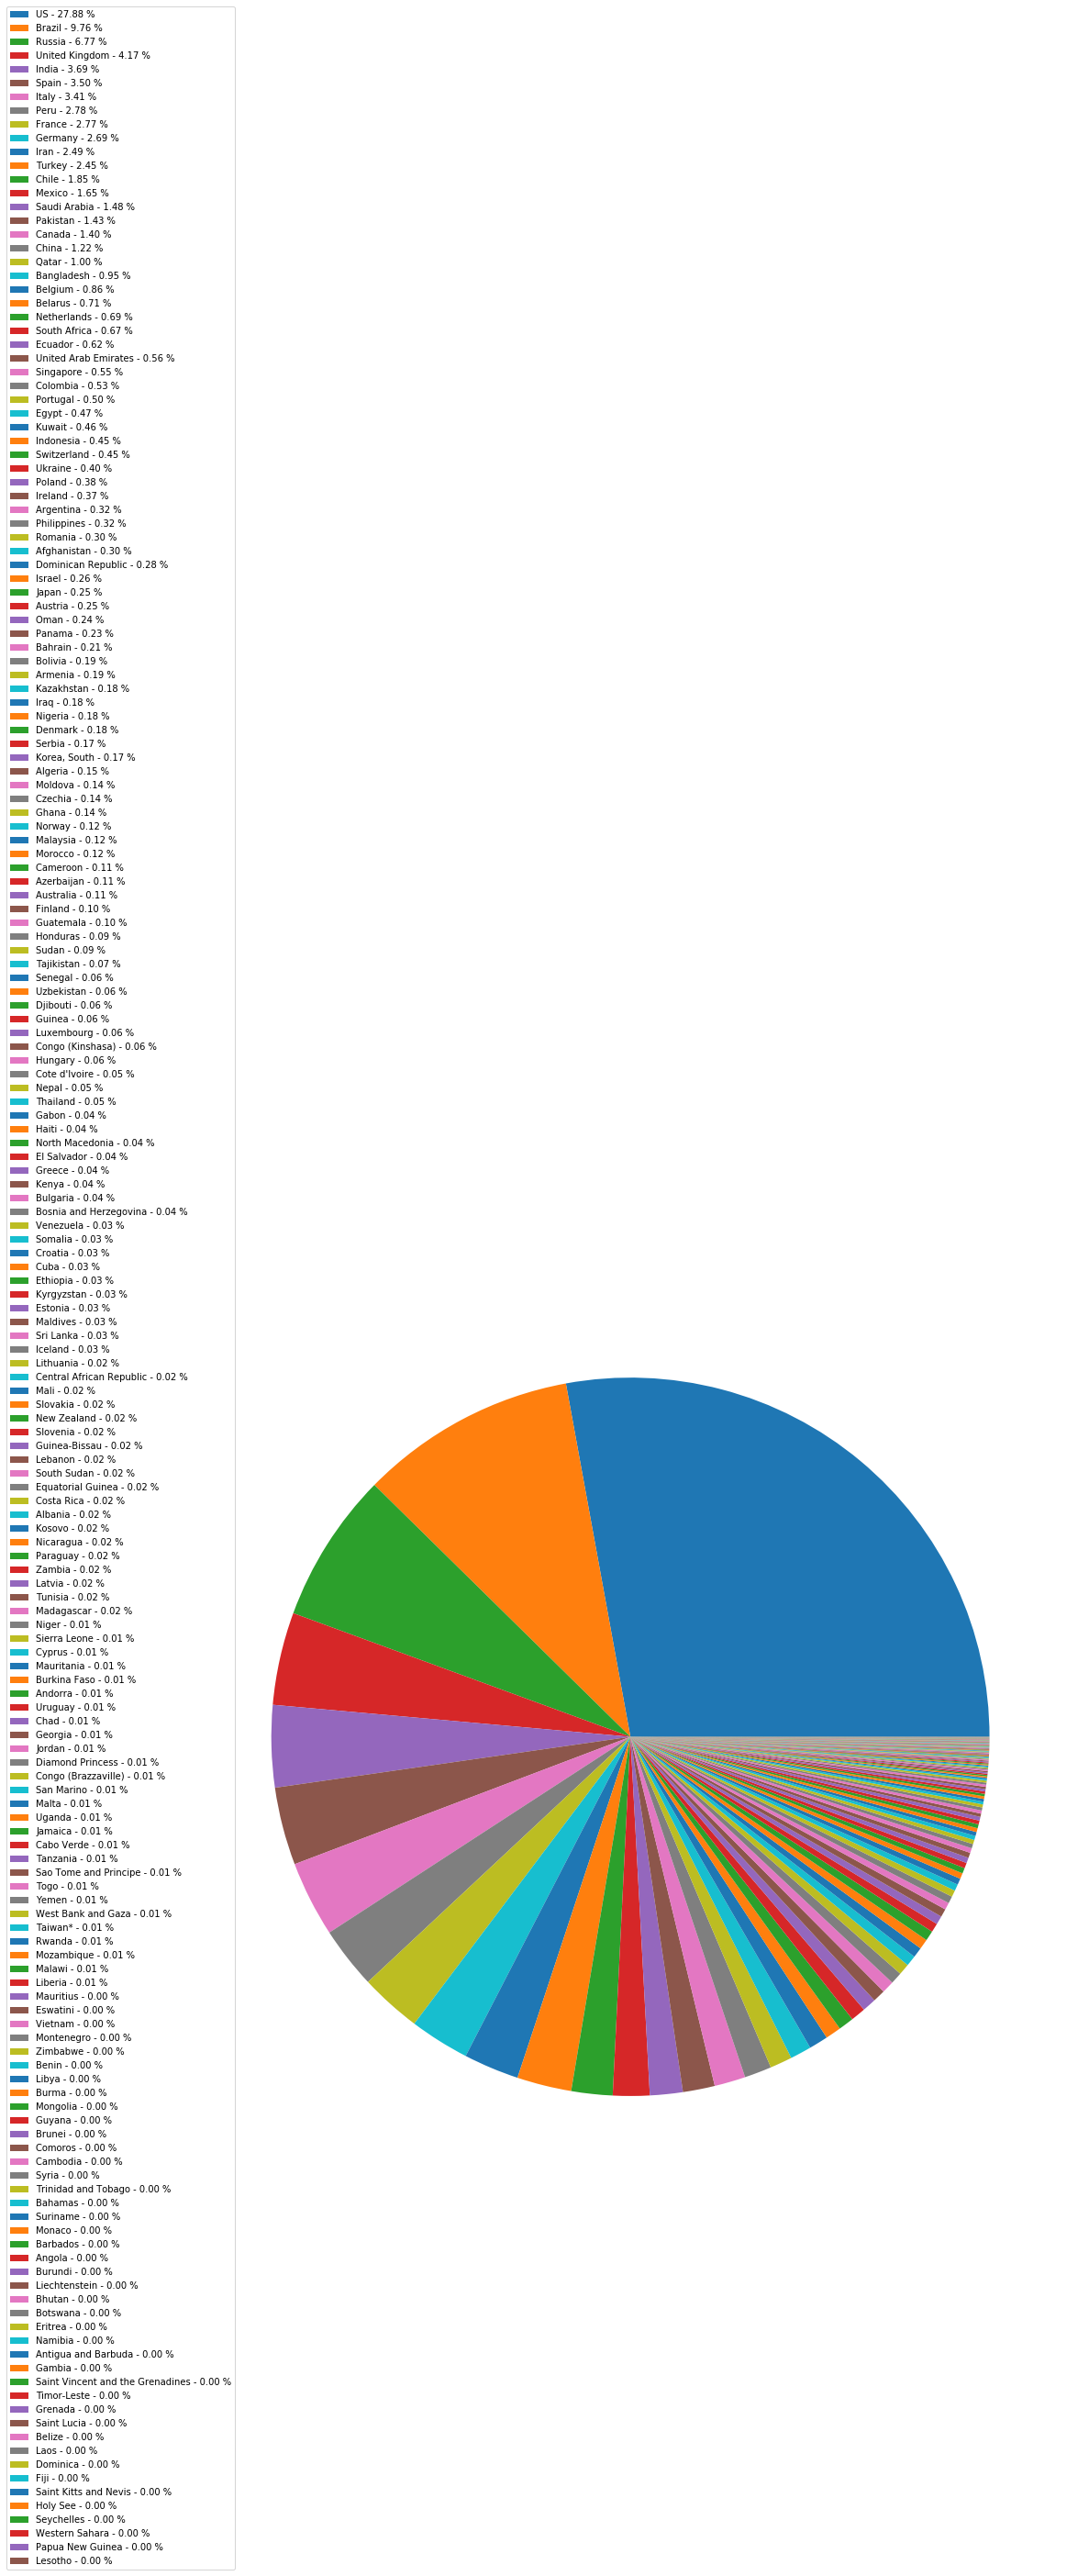

In [18]:
plt.figure(figsize=(18,18))
patches, texts = plt.pie(covid_df['Total Confirmed'])
total_cases = sum(covid_df['Total Confirmed'])
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(covid_df['Name of Country'], 
                                                        covid_df['Total Confirmed']*100/total_cases)]


patches, labels, dummy =  zip(*sorted(zip(patches, labels, covid_df['Total Confirmed']), 
                                      key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.2, 1.), fontsize=10)

plt.savefig('piechart.png', bbox_inches='tight')

In [19]:
covid_df.head(10)

,ID,Name of Country,Total Confirmed,Active Cases,Deaths,Recovered,Latitude,Longitude,Last Updated at
0,18,US,1922054,1363382,109846,500849,40,-100,Sun Jun 7 21:03:23 2020
1,22,Brazil,672846,359767,35930,277149,-14.235,-51.9253,Sun Jun 7 21:03:23 2020
2,14,Russia,467073,234950,5851,226272,61.524,105.319,Sun Jun 7 21:03:23 2020
3,17,United Kingdom,287621,245757,40625,1239,55,-3,Sun Jun 7 21:03:23 2020
4,94,India,254242,124387,7117,122738,20.5937,78.9629,Sun Jun 7 21:03:23 2020
5,19,Spain,241550,64038,27136,150376,40.4637,-3.74922,Sun Jun 7 21:03:23 2020
6,11,Italy,234801,35877,33846,165078,41.8719,12.5674,Sun Jun 7 21:03:23 2020
7,23,Peru,191758,103726,5301,82731,-9.19,-75.0152,Sun Jun 7 21:03:23 2020
8,7,France,190759,90690,29145,70924,46.2276,2.2137,Sun Jun 7 21:03:23 2020
9,8,Germany,185745,7856,8685,169204,51.1657,10.4515,Sun Jun 7 21:03:23 2020


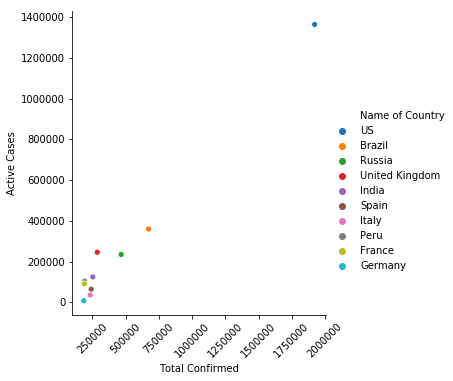

In [20]:
chart = sns.relplot(data=covid_df.head(10), x='Total Confirmed', y='Active Cases', hue='Name of Country')
chart.fig.draw(
    chart.fig.canvas.get_renderer()
)
for ax in chart.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

/home/shubh/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/shubh/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


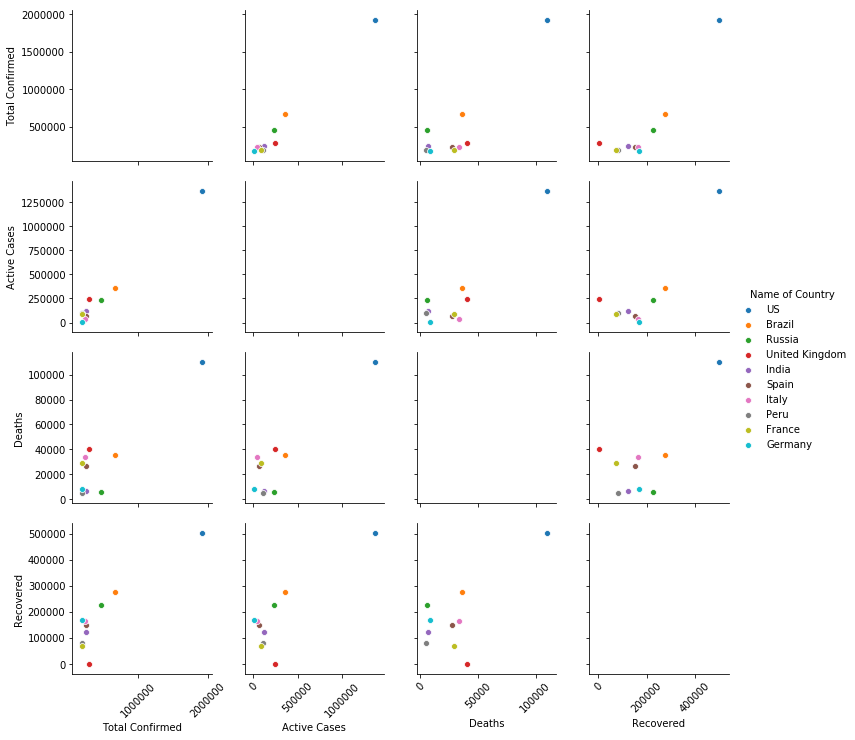

In [21]:
top_10 = covid_df.head(10)
chart = sns.pairplot(data=top_10[['Name of Country', 'Total Confirmed', 'Active Cases', 'Deaths', 'Recovered']], 
                     hue='Name of Country')
chart.fig.draw(
    chart.fig.canvas.get_renderer()
)
for ax in chart.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

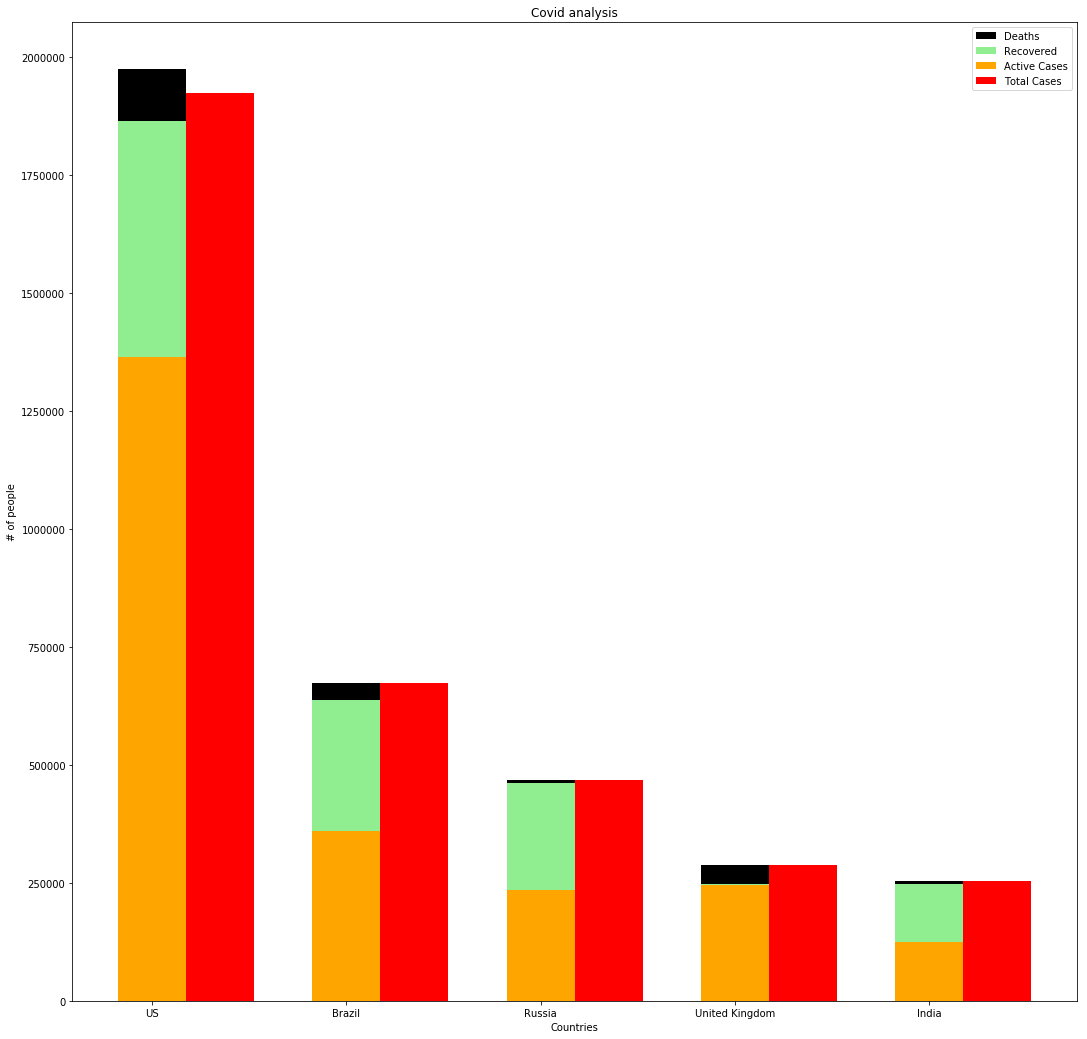

In [23]:
plt.figure(figsize=(18,18))
N = 5
top_5_countries = covid_df.head(N)
countries = top_5_countries['Name of Country']
width = 0.35
no_cases = top_5_countries['Total Confirmed']
active_cases = top_5_countries['Active Cases']
recovered = top_5_countries['Recovered']
deaths = top_5_countries['Deaths']
ind = np.arange(N)

plt.bar(ind, deaths, width=width, label='Deaths', color='black', bottom=recovered+active_cases)
plt.bar(ind, recovered, width=width, label='Recovered', color='lightgreen', bottom=active_cases)
plt.bar(ind, active_cases, width=width, label='Active Cases', color='orange')
plt.bar(ind + width, no_cases, width=width,label='Total Cases', color='red')

plt.xticks(ind, countries)
plt.ylabel("# of people")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("Covid analysis")

plt.show()